Eleonora Pura - 17-732-678

In [1]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.stats as sp
import networkx.algorithms.community as nxacom

<h1>A04.1 Community detection</h1>

<p>a), b) Find the communities using the greedy modularity maximization by Clauset Newman and Moore and the label propagation algorithm.</p>
<p>Assign to each community a color and draw the resulting graph.</p>

In [4]:
def assign_community_color(graph, community):
    colormap = plt.cm.Paired
    colors = [colormap(i) for i in np.linspace(0.25, 0.75, len(community))]
    for v in graph.nodes():
        for i in range(len(community)):
            if v in community[i]:
                graph.nodes[v]['color'] = colors[i]
                
    return graph

def plot_graph(graph, filename, algorithm):
    plt.rcParams.update({'font.size': 12})
    plt.figure(3, figsize=(11, 9))
    plt.title("{} with {}".format(filename, algorithm))
    nx.draw(graph, node_size=45, node_color = [graph.nodes[v]['color'] for v in graph.nodes()], with_labels=False, pos=nx.spring_layout(graph))
    plt.show()

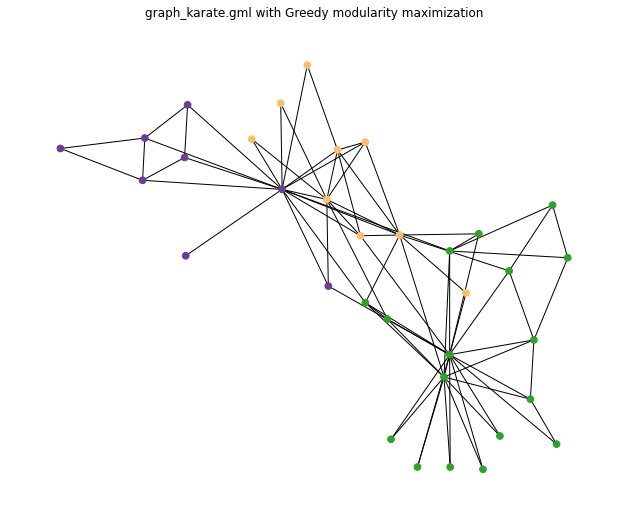

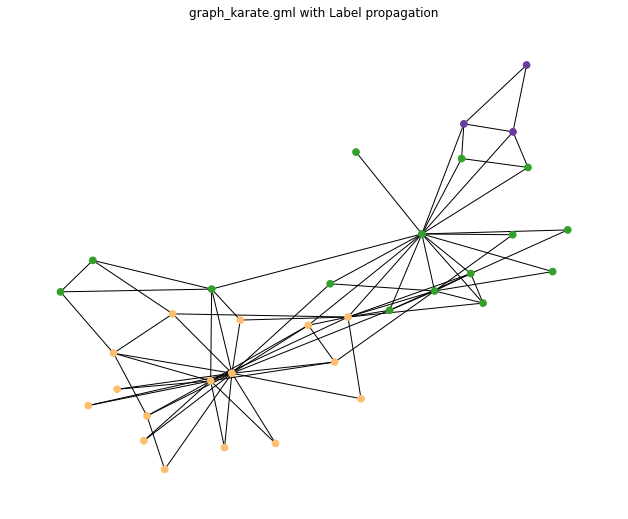

Communities with Greedy modularity maximization: 3, with randomized graph: 6
Communities with Label propagation: 3, with randomized graph: 1


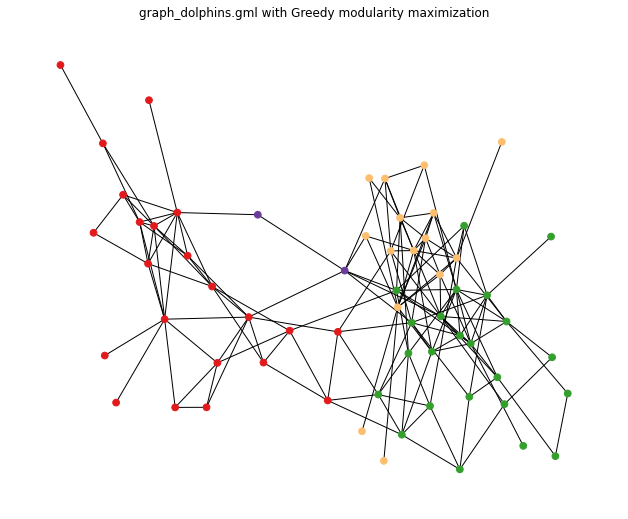

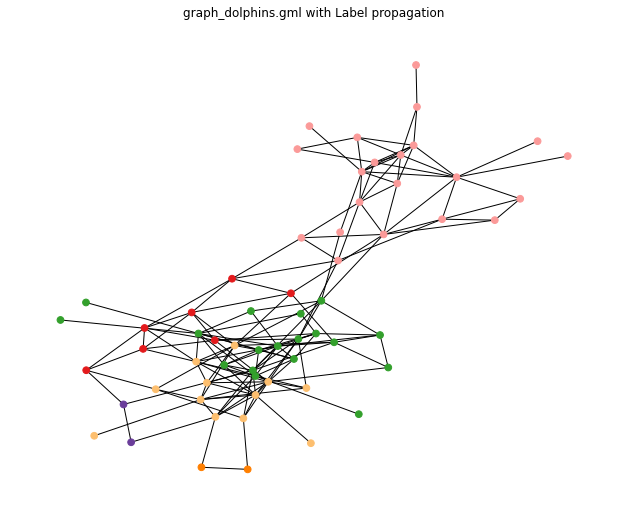

Communities with Greedy modularity maximization: 4, with randomized graph: 5
Communities with Label propagation: 6, with randomized graph: 2


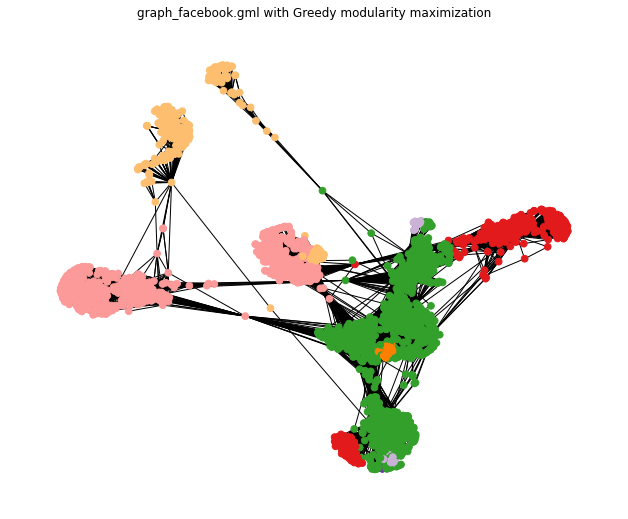

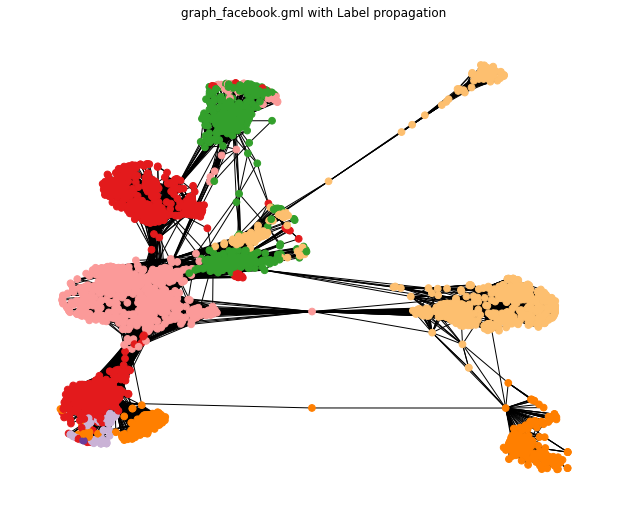

Communities with Greedy modularity maximization: 13, with randomized graph: 18
Communities with Label propagation: 44, with randomized graph: 2


In [5]:
filenames = ["graph_karate.gml", "graph_dolphins.gml", "graph_facebook.gml"]
for i in range(len(filenames)):
    filename = filenames[i]
    g = nx.read_gml("data/{}".format(filename))
    g_rnd = nx.algorithms.smallworld.random_reference(g ,niter = 1, connectivity=False)

    gmc=list(nxacom.greedy_modularity_communities(g))
    gmc_rnd = list(nxacom.greedy_modularity_communities(g_rnd))
    new_graph = assign_community_color(g, gmc)
    algorithm1 = "Greedy modularity maximization"
    plot_graph(new_graph, filename, algorithm1)

    lpc=list(nxacom.label_propagation_communities(g))
    lpc_rnd = list(nxacom.label_propagation_communities(g_rnd))
    new_graph=assign_community_color(g, lpc)
    algorithm2 = "Label propagation"
    plot_graph(new_graph, filename, algorithm2)
                    
    print("Communities with {}: {}, with randomized graph: {}".format(algorithm1, len(gmc), len(gmc_rnd)))
    print("Communities with {}: {}, with randomized graph: {}".format(algorithm2, len(lpc), len(lpc_rnd)))

<h1>A04.2 Erdos-Renyi random networks</h1>

<p>Task: Generate three Erdos-Renyi networks with 𝑁 = 500 nodes and average degree (a)⟨𝑘⟩ = 0.2, (b)⟨𝑘⟩ = 1 and (c) ⟨𝑘⟩ = 2. Visualize these networks. </p>

In [57]:
def draw_er_network(N, k):
    p = k/(N-1)

    g = nx.erdos_renyi_graph(N, p)
    pos = nx.spring_layout(g, iterations=10)
    colors = []
    for node in g:
        if node < N/2:
            colors.append('red')
        else:
            colors.append('yellow')

    plt.figure(3, figsize=(27, 27))
    plt.rcParams.update({'font.size': 18})
    plt.title("Erdos-Renyi network with k={}".format(k))
    
    nx.draw(g, node_color = colors, with_labels=False, node_size=500, pos = pos)

    plt.show()

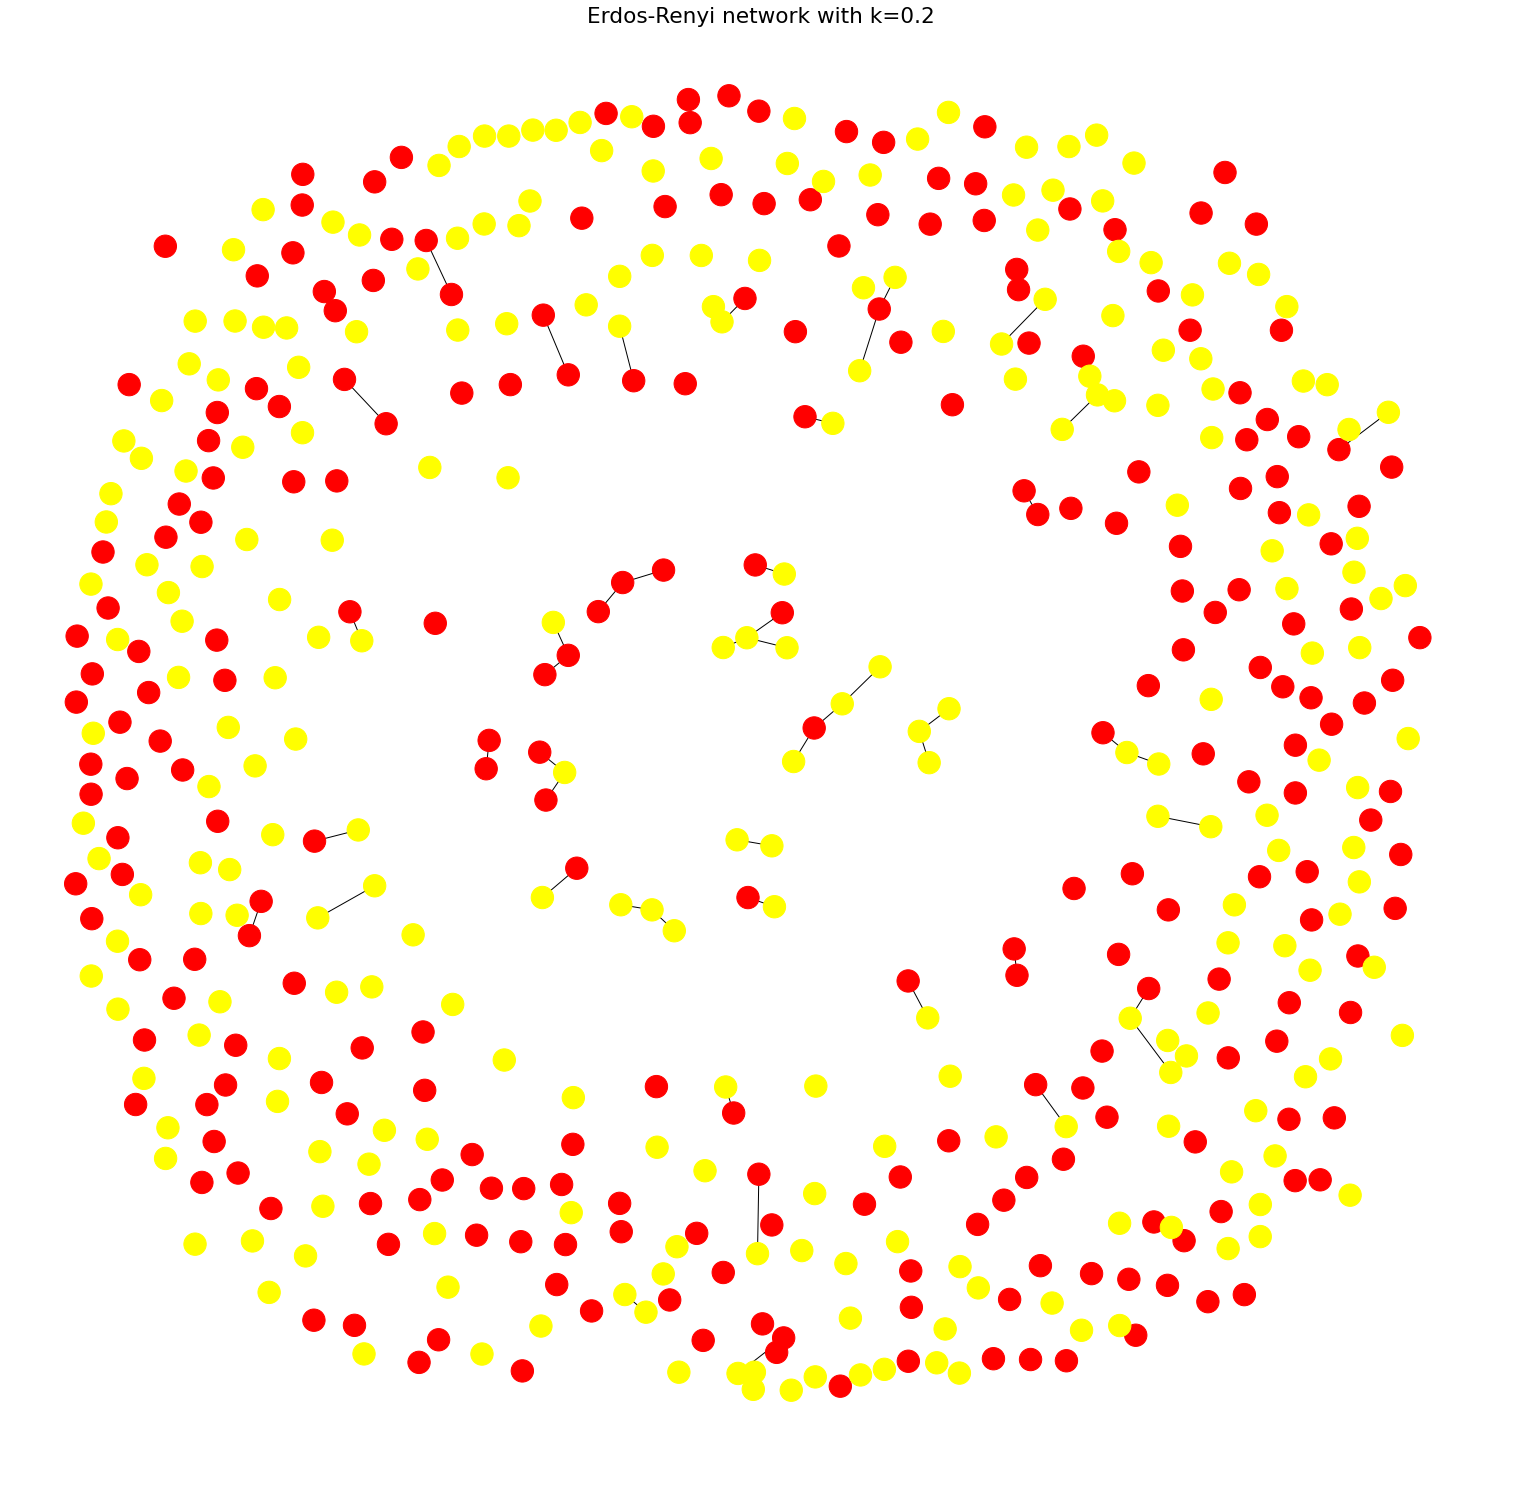

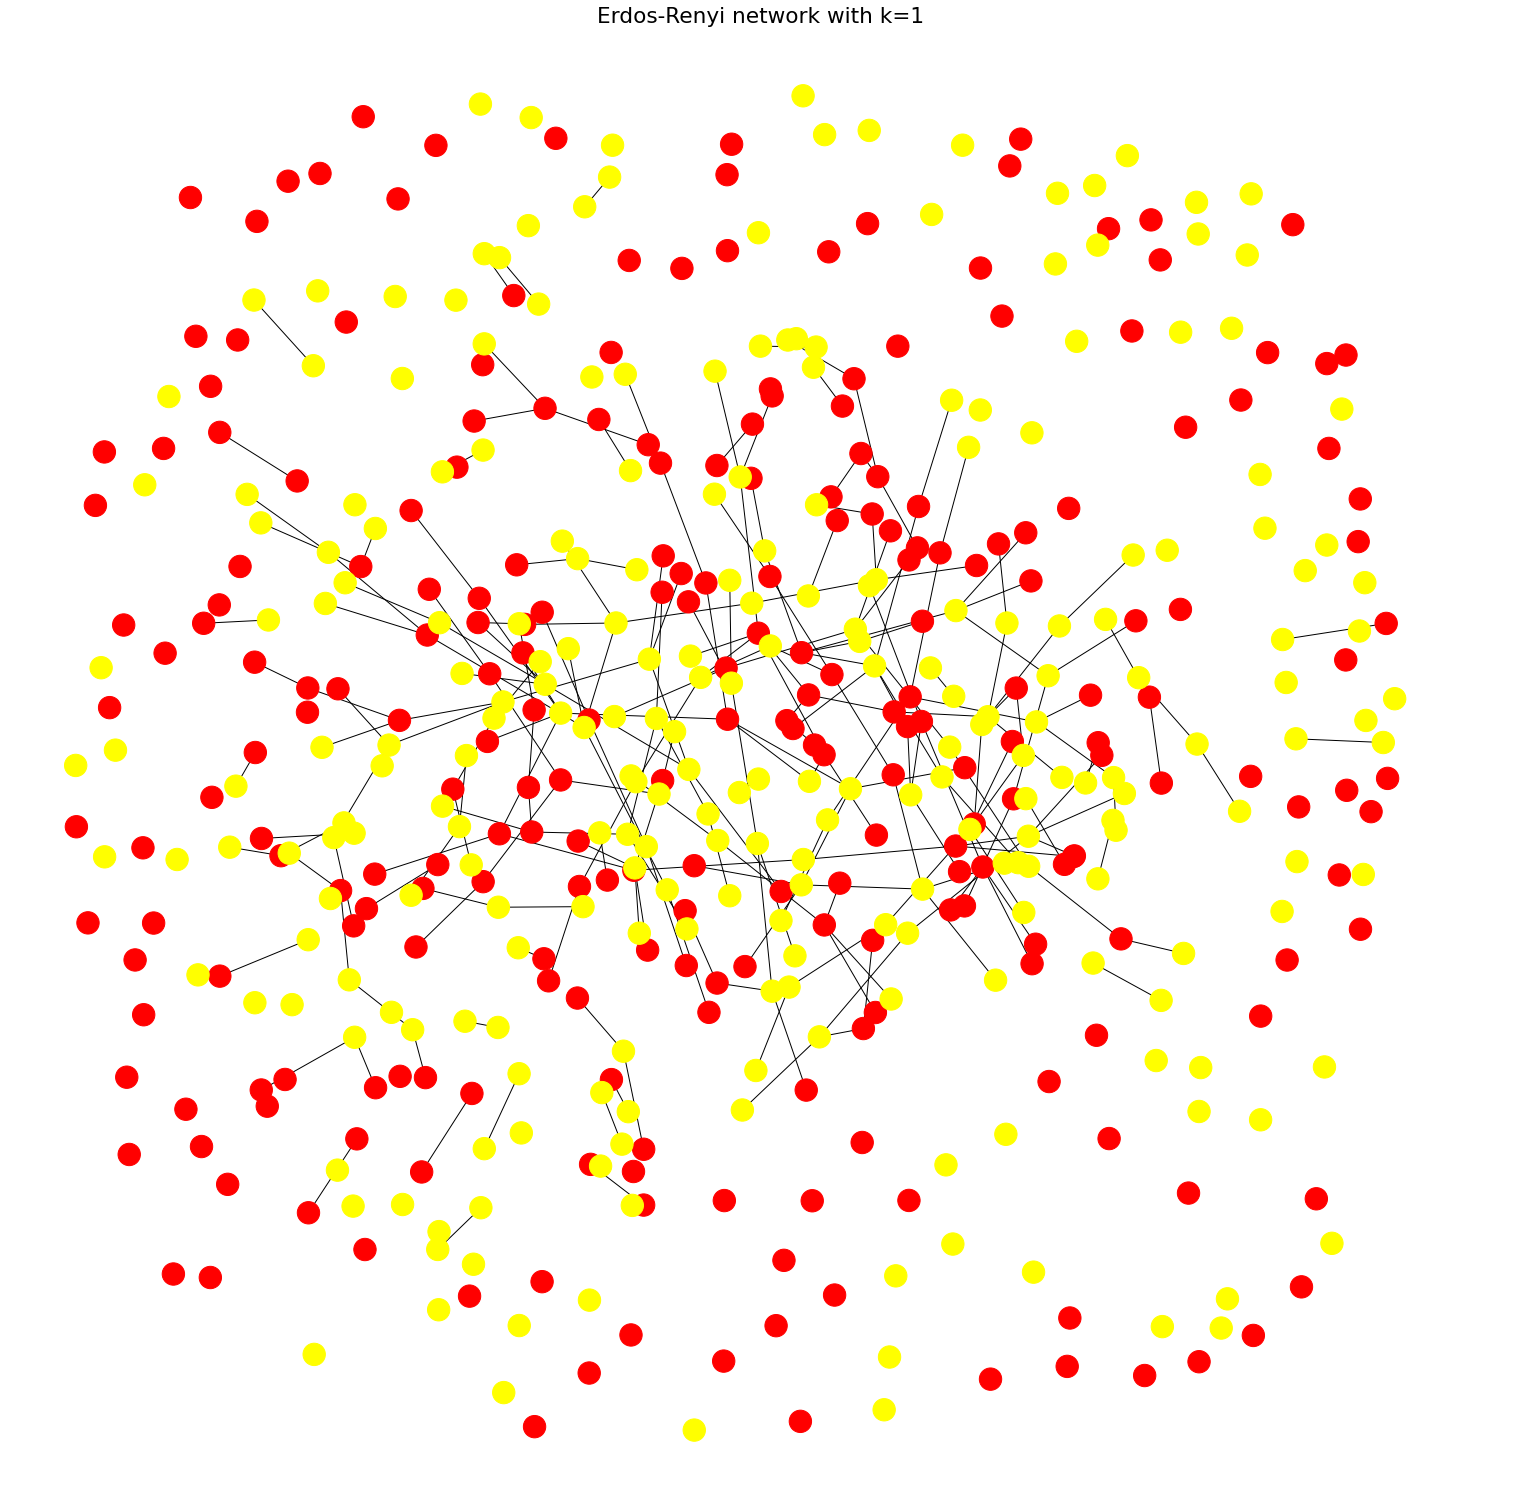

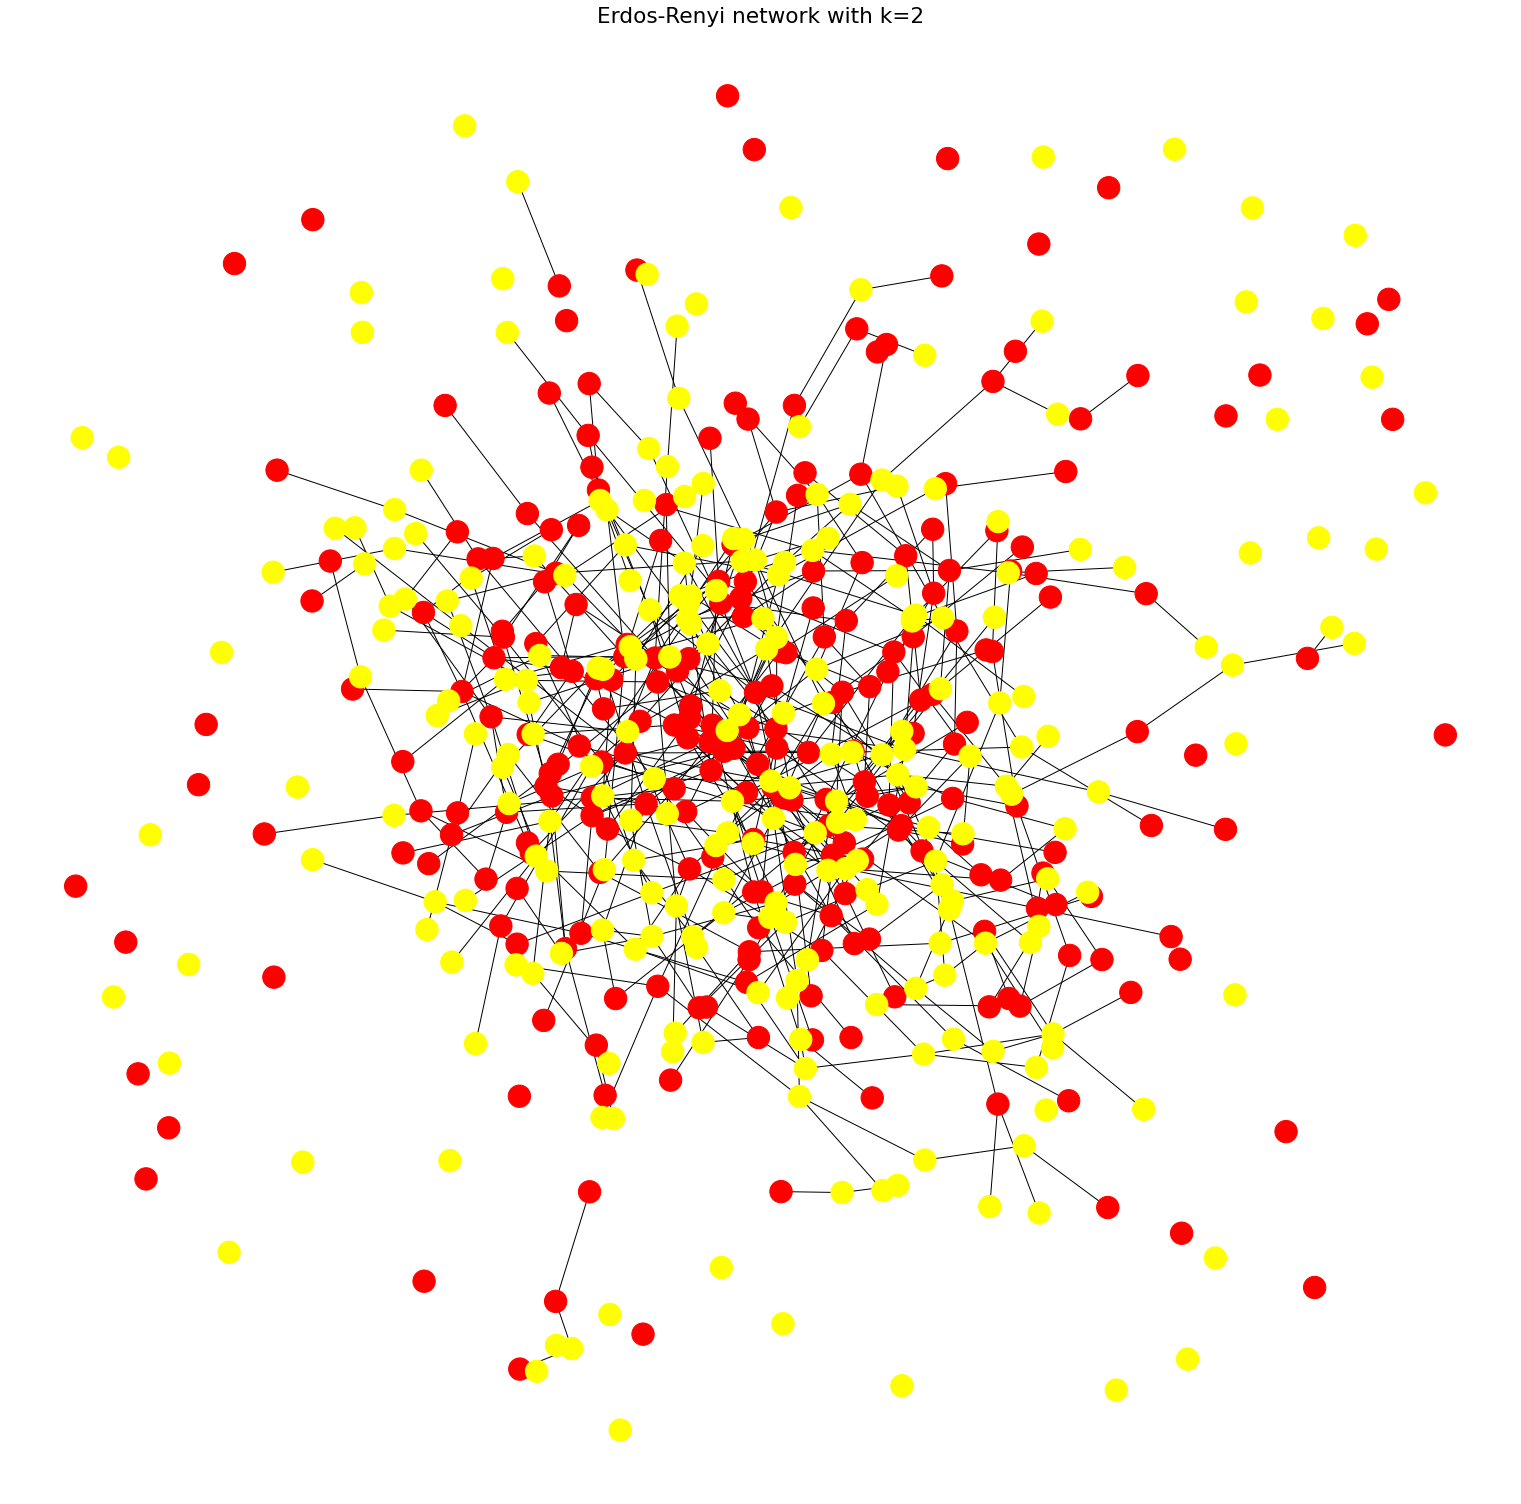

In [58]:
draw_er_network(500, 0.2)
draw_er_network(500, 1)
draw_er_network(500, 2)

<p>1. Plot the probability that a node belongs to the largest connected component 𝑁𝐺/𝑁 as a function of 𝑝 and mark with a vertical line the critical probability 𝑝𝑐 = 1/N</p>

In [8]:
def plot_node_probability(x, y, N):
    plt.figure(3, figsize=(10, 8))
    plt.axvline(x=1/N, linestyle='--')
    plt.plot(x, y, color='r')
    plt.title("Probability that a node belongs to the largest connected component Ng/N")
    plt.xscale('log'),
    plt.xlabel("P")
    plt.ylabel("P(node belongs to largest connected component Ng/N)")
    plt.show()

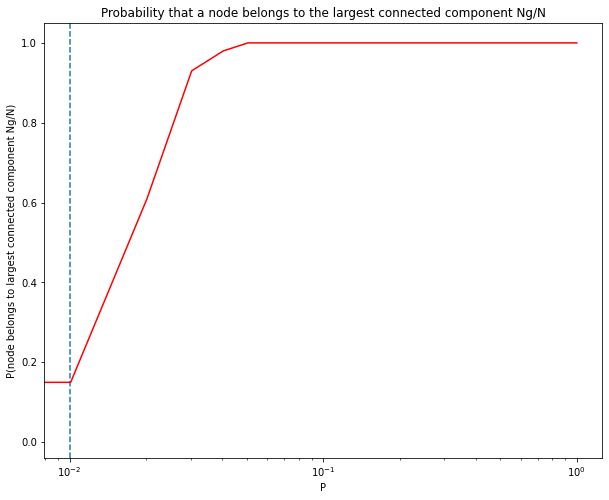

In [9]:
N=100
p = list(np.linspace(0, 1, N))
connected = []

for i in range(N) :
    g = nx.erdos_renyi_graph(N, p[i])
    components = [i for i in nx.connected_components(g)]
    maxcomp = max(components, key=len)
    connected.append(len(maxcomp)/N)
plot_node_probability(p, connected, N)

<p> 2. Plot the average clustering ⟨𝐶⟩ as a function of 𝑝 and give an interpretation of the result </p>

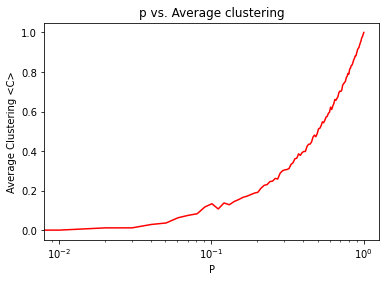

In [10]:
avg_c = []

for i in range(N):
    g = nx.erdos_renyi_graph(N, p[i])
    avg_c.append(nx.average_clustering(g))
    
plt.plot(p, avg_c, color='r')
plt.title("p vs. Average clustering")
plt.xscale('log')
plt.xlabel("P")
plt.ylabel("Average Clustering <C>")
plt.show()

Give an interpretation of the result:

<p>The average clustering measures how likely it is that if two nodes are common neighbours of another, they are connected to each others. In Erdos-Renyi graphs, links between pairs of nodes are equally likely to exist. Of course the higher the probability is, the higher would be likely that the average clustering increases as well. </p>



<h1>A04.3 Small-world with high clustering</h1>

Task: Generate many WS small-world networks with 𝑁 =
100 nodes and fixed number of neighbors for each node
2𝜅 = 10. As a function of the rewiring probability 𝑝, using
a logarithmic scale for the 𝑝-axis

<p>1. Plot the average clustering ⟨𝐶(𝑝)⟩/⟨𝐶(0)⟩ and check if it correctly reproduces the analytical result</p>

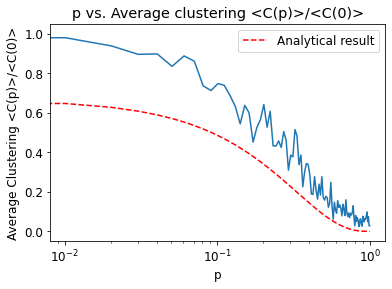

In [38]:
N = 100
k = 5
p = list(np.linspace(0, 1, N))
avg_c = []
c_coeff = 3/2*(k-1)/((2*k)-1)
avg_c_an_res = []
g_p0 = nx.watts_strogatz_graph(N, k, 0)
for i in range(N):
    g = nx.watts_strogatz_graph(N, k, p[i])
    avg_c.append(nx.average_clustering(g)/nx.average_clustering(g_p0))
    
    # ⟨𝐶(𝑝)⟩ ≈ (3/2*(𝜅 − 1)/(2𝜅 − 1))*(1 − 𝑝)3
    avg_c_an_res.append(c_coeff*pow(1-p[i], 3))


plt.rcParams.update({'font.size': 12})
plt.title("p vs. Average clustering <C(p)>/<C(0)>")
plt.plot(p, avg_c)
plt.plot(p, avg_c_an_res, color='r', linestyle='--', label='Analytical result')
plt.xlabel("p")
plt.ylabel("Average Clustering <C(p)>/<C(0)>")
plt.xscale("log")
plt.legend()
plt.show()

<p>2. Plot the average shortest-path length 𝐷(𝑝)/𝐷(0)</p>

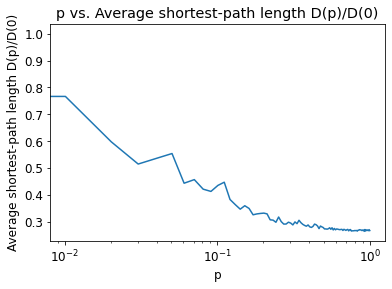

In [60]:
avg_spl = []
spl_p0 = nx.average_shortest_path_length(g_p0)
for i in range(N):
    g = nx.watts_strogatz_graph(N, k, p[i])
    avg_spl.append(nx.average_shortest_path_length(g)/spl_p0)

plt.rcParams.update({'font.size': 12})    
plt.title("p vs. Average shortest-path length D(p)/D(0)")
plt.plot(p, avg_spl)
plt.xscale('log')
plt.xlabel('p')
plt.ylabel('Average shortest-path length D(p)/D(0)')
plt.show()
